# Proceso de comprensión y preparación de datos

## Recogida, comprensión y evaluación de calidad de datos
Un problema que se identificó a priori es que el tipo de dato de SDG en el test set es float, cuando debería ser int. Por otro lado, hay muchos caracteres especiales que deben ser tratados.

In [46]:
import pandas as pd
import re
from sklearn.svm import SVC
import chardet
from num2words import num2words
import spacy
pd.set_option('display.max_rows', None)

# Mostrar todo el contenido de las celdas, sin truncar
pd.set_option('display.max_colwidth', None)

file1 = 'ODScat_345.csv' 
file2 = 'TestODScat_345.csv'  

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

# Functions
def find_unusual_characters(df, column_name):
    all_text = ' '.join(df[column_name].astype(str))
    unusual_chars = re.findall(r'[^\w\s,.!?;:\-()\'"]', all_text)
    return set(unusual_chars)

# Understanding
print("First few rows of training set:")
display(df1.head())

print("First few rows of test set:")
display(df2.head())

print("\nShape of training set:", df1.shape)

print("Shape of validation set:", df2.shape)

print("\nInfo for training set:")
df1.info()
print("\nInfo for validation set:")
df2.info()

print("\nDescriptive statistics for training set:")
display(df1.describe(include='all')) 

print("\nDescriptive statistics for validation set:")
display(df2.describe(include='all'))

print("\nBasic statistics for natural_text length in training set:")
display(df1['Textos_espanol'].str.len().describe())

print("\nBasic statistics for natural_text length in validation set:")
display(df2['Textos_espanol'].str.len().describe())

print("Distribution of SDG categories in training set:")
distribution_file1 = df1['sdg'].value_counts()
display(distribution_file1)

print("\nDistribution of SDG categories in test set:")
distribution_file2 = df2['sdg'].value_counts()
display(distribution_file2)

print("\nUnusual characters in training set:")
unusual_chars_file1 = find_unusual_characters(df1, 'Textos_espanol')
display(unusual_chars_file1)

print("\nUnusual characters in validation set:")
unusual_chars_file2 = find_unusual_characters(df2, 'Textos_espanol')
display(unusual_chars_file2)

# Consistency
print("\nColumn names in training set:", df1.columns.tolist())
print("Column names in test:", df2.columns.tolist())

print("\nData types in training set:")
display(df1.dtypes)

print("Data types in test set:")
display(df2.dtypes)

# Uniqueness
print("Checking for duplicated rows within each file...\n")

duplicates_file1 = df1[df1.duplicated()]
print(f"Number of duplicated rows in training set: {len(duplicates_file1)}")
display(duplicates_file1)

duplicates_file2 = df2[df2.duplicated()]
print(f"Number of duplicated rows in test set: {len(duplicates_file2)}")
display(duplicates_file2)

print("\nChecking for common rows between file1 and file2...")

common_rows = pd.merge(df1, df2, how='inner')
print(f"Number of common rows between file1 and file2: {len(common_rows)}")
display(common_rows)

if len(common_rows) > 0:
    print("\nCommon rows found in both files:")
    display(common_rows)
else:
    print("\nNo common rows found in both files.")

# Missing values
print("\nMissing values in training set:")
display(df1.isnull().sum())

print("Missing values in validation set:")
display(df2.isnull().sum())

# Validity
print("\nUnique labels in test set:")
display(df1['sdg'].unique())

print("Unique labels in validation set:")
display(df2['sdg'].unique())


First few rows of training set:


,Textos_espanol,sdg
0,"Por ejemplo, el nÃºmero de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparaciÃ³n con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la poblaciÃ³n ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El nÃºmero de recetas que no pudieron ser surtidas en su totalidad por un farmacÃ©utico debido a la falta de existencias es de 33% dentro del SP en comparaciÃ³n con 14% dentro del IMSS segÃºn los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas mÃ¡s altas de recetas surtidas). Ambas cifras se encuentran entre las mÃ¡s altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden ofrecer un bajo nivel de atención a la población local. El gobierno provincial proporciona subsidios del lado de la oferta a los hospitales.",3
2,"Claramente, hay muchos otros factores en juego, en particular, una variedad de barreras y determinantes sociales. Estos pueden estar relacionados con el género, la clase, la etnia, la casta, el idioma y la religión, y surgen de estructuras, normas y procesos sociales arraigados que aceptan e incluso fomentan distribuciones injustas de la riqueza y los recursos sociales. Por ejemplo, las personas que viven con el VIH y algunas otras enfermedades crónicas enfrentan altos niveles de estigma y discriminación que dificultan su acceso a pruebas médicas, tratamiento, atención y apoyo. Por lo tanto, los gobiernos que buscan mejorar los estándares de salud querrán mejorar la condición de la mujer, brindar servicios de salud reproductiva efectivos, implementar programas integrales de lactancia materna en línea con las recomendaciones actuales y aumentar las presiones comunitarias contra el aborto selectivo por sexo. Las personas pobres, que carecen de educación e información, o de fondos para opciones más saludables, son más vulnerables al impacto de las ENT que los ricos y es probable que mueran antes. Directa e indirectamente, las ENT tendrán impactos de gran alcance en el progreso hacia los ODM.",3
3,"Por ejemplo, el estado australiano de Victoria creó una agencia de promoción de la salud financiada con los impuestos sobre el tabaco, y varios estados de EE.UU. (California, Massachusetts, Arizona y Oregón) han destinado parte de los ingresos procedentes de los impuestos especiales sobre el tabaco a actividades de educación y control del tabaco, mientras que en Nueva Jersey, Ohio y Texas los ingresos procedentes del alcohol se utilizan para programas de educación y prevención relacionados con el alcohol (Sassi et al., 2004), Los impuestos locales pueden ser una fuente importante de ingresos, sobre todo en los sistemas sanitarios descentralizados (por ejemplo, Dinamarca, Finlandia, Italia y Suecia)17 . Además, el nivel de los impuestos locales puede fijarse en función de las preferencias locales sobre el nivel y la calidad de los servicios médicos. Sin embargo, en ausencia de un mecanismo de transferencia ajustado al riesgo y gestionado centralmente, la descentralización reduce la mancomunación de riesgos y podría dar lugar a mayores disparidades sanitarias interregionales.",3
4,"El consumo anual de alcohol se estima en 15,7 litros al año para los hombres, más de un 50% por encima de la media de la OCDE (10,4) (Sistema mundial de información sobre alcohol y salud de la OMS), lo que puede ayudar a explicar la

First few rows of test set:


,Textos_espanol,sdg
0,"Han examinado la contribuciÃ³n de las universidades y las instituciones de educaciÃ³n terciaria al desarrollo del capital humano y las competencias, la transferencia de tecnologÃa y la innovaciÃ³n empresarial, el desarrollo social, cultural y medioambiental, y la creaciÃ³n de capacidad regional. El proceso de revisiÃ³n ha facilitado la creaciÃ³n de asociaciones en ciudades y regiones al reunir a instituciones de educaciÃ³n terciaria y organismos pÃºblicos y privados para identificar objetivos estratÃ©gicos y trabajar juntos para alcanzarlos. Complementa las revisiones que se han llevado a cabo en la región transfronteriza México-Estados Unidos, de gran importancia estratégica y económica, como las de Nuevo León, la región Paso del Norte y, más recientemente, la del sur de Arizona (2011), junto al estado de Sonora.",NaN
1,"En la última década, y en particular desde 2010, el número de altas per cápita ha tendido a disminuir, y ahora está en línea con la media de la OCDE mencionada anteriormente. Por ejemplo, los habitantes de zonas rurales representan el 43% de la población, pero sólo el 32% de las altas hospitalarias. A falta de información complementaria, no es posible determinar si esta diferencia indica o no disparidades en el acceso de las poblaciones rurales y, en caso afirmativo, si las causas son geográficas, culturales o infraestructurales. No parece que se recojan datos sobre el acceso a la atención desde el punto de vista del paciente, lo que ayudaría a comprender la naturaleza de los obstáculos al acceso (y las soluciones). En general, no es posible determinar con los datos disponibles si los ingresos o las características socioeconómicas de los pacientes influyen a la hora de llegar a las puertas del hospital o de ser ingresado. El acceso desigual probablemente se deba también a la incapacidad de los centros de las distintas regiones para prestar los mismos servicios.",NaN
2,"¿En qué países los estudiantes de alto rendimiento se sienten atraídos por la docencia? Las encuestas de docentes en servicio a menudo muestran que los maestros actuales están muy motivados por los beneficios intrínsecos de la enseñanza: trabajar con niños y ayudarlos a desarrollarse y hacer una contribución a la sociedad, mientras que los estudios que encuestan a grandes grupos de graduados sobre sus opciones de carrera muestran que la los salarios relativos de las ocupaciones de los graduados juegan un papel en sus elecciones: si los salarios de los docentes hubieran sido más altos, más ""docentes potenciales"" habrían considerado seriamente una carrera en la enseñanza. A nivel de país, los resultados indican que tanto los salarios de los docentes como la estatus social de la profesión docente se asocian positivamente con las expectativas de los estudiantes de trabajar como docentes.",NaN
3,"A raíz de su preocupación por el hecho de que los médicos de todo el sistema sanitario japonés no fueran capaces de identificar los signos de sufrimiento psicológico que podrían ayudar a reducir los suicidios, la Asociación Médica Japonesa informa de que empezó a compartir información y orientaciones sobre la depresión con todos los médicos, primero en 2004 y luego de nuevo en 2009. En la actualidad, sólo se recogen indicadores sobre la tasa de reclusión y contención, y de ingresos involuntarios, por parte de los proveedores y a nivel prefectural. La información recopilada sistemáticamente sobre el sistema de atención de salud mental se limita a indicadores estructurales: instalaciones, número de personal, número de camas.",NaN
4,"1999|H5|, Ares Abalde, 2014[ij]. El pequeño número de estudiantes y docentes en estas escuelas da forma a las formas en que las escuelas pueden utilizar el tiempo de docentes y alumnos, y cómo estos se agrupan por grados y habilidades (Mulcahy, 2009[ii6i). Los padres pueden estar preocupados por el hecho de que sus hijos aprendan junto con niños de diferentes edades en el mismo salón de clases (Cornish, 20


Shape of training set: (4049, 2)
Shape of validation set: (702, 2)

Info for training set:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4049 entries, 0 to 4048
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Textos_espanol  4049 non-null   object
 1   sdg             4049 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 63.4+ KB

Info for validation set:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Textos_espanol  702 non-null    object 
 1   sdg             0 non-null      float64
dtypes: float64(1), object(1)
memory usage: 11.1+ KB

Descriptive statistics for training set:


,Textos_espanol,sdg
count,4049,4049.000000
unique,4049,NaN
top,"Por ejemplo, el nÃºmero de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparaciÃ³n con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la poblaciÃ³n ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El nÃºmero de recetas que no pudieron ser surtidas en su totalidad por un farmacÃ©utico debido a la falta de existencias es de 33% dentro del SP en comparaciÃ³n con 14% dentro del IMSS segÃºn los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas mÃ¡s altas de recetas surtidas). Ambas cifras se encuentran entre las mÃ¡s altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",NaN
freq,1,NaN
mean,NaN,4.051124
std,NaN,0.814338
min,NaN,3.000000
25%,NaN,3.000000
50%,NaN,4.000000
75%,NaN,5.000000



Descriptive statistics for validation set:


,Textos_espanol,sdg
count,702,0.0
unique,702,NaN
top,"Han examinado la contribuciÃ³n de las universidades y las instituciones de educaciÃ³n terciaria al desarrollo del capital humano y las competencias, la transferencia de tecnologÃa y la innovaciÃ³n empresarial, el desarrollo social, cultural y medioambiental, y la creaciÃ³n de capacidad regional. El proceso de revisiÃ³n ha facilitado la creaciÃ³n de asociaciones en ciudades y regiones al reunir a instituciones de educaciÃ³n terciaria y organismos pÃºblicos y privados para identificar objetivos estratÃ©gicos y trabajar juntos para alcanzarlos. Complementa las revisiones que se han llevado a cabo en la región transfronteriza México-Estados Unidos, de gran importancia estratégica y económica, como las de Nuevo León, la región Paso del Norte y, más recientemente, la del sur de Arizona (2011), junto al estado de Sonora.",NaN
freq,1,NaN
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN



Basic statistics for natural_text length in training set:


count    4049.000000
mean      699.632502
std       228.988965
min       294.000000
25%       531.000000
50%       657.000000
75%       827.000000
max      1513.000000
Name: Textos_espanol, dtype: float64


Basic statistics for natural_text length in validation set:


count     702.000000
mean      693.564103
std       219.593226
min       338.000000
25%       515.250000
50%       665.500000
75%       836.500000
max      1468.000000
Name: Textos_espanol, dtype: float64

Distribution of SDG categories in training set:


sdg
5    1451
4    1354
3    1244
Name: count, dtype: int64


Distribution of SDG categories in test set:


Series([], Name: count, dtype: int64)


Unusual characters in training set:


{'#',
 '$',
 '%',
 '&',
 '*',
 '+',
 '/',
 '<',
 '=',
 '>',
 '@',
 '[',
 ']',
 '{',
 '|',
 '~',
 '¡',
 '¢',
 '£',
 '©',
 '«',
 '®',
 '°',
 '±',
 '»',
 '¿',
 '˜',
 '\u200b',
 '–',
 '—',
 '’',
 '“',
 '”',
 '…',
 '€',
 '™'}


Unusual characters in validation set:


{'$',
 '%',
 '&',
 '*',
 '+',
 '/',
 '@',
 '[',
 '\\',
 ']',
 '|',
 '¡',
 '©',
 '«',
 '±',
 '»',
 '¿',
 '˜',
 '\u200b',
 '—',
 '“',
 '”',
 '€',
 '™'}


Column names in training set: ['Textos_espanol', 'sdg']
Column names in test: ['Textos_espanol', 'sdg']

Data types in training set:


Textos_espanol    object
sdg                int64
dtype: object

Data types in test set:


Textos_espanol     object
sdg               float64
dtype: object

Checking for duplicated rows within each file...

Number of duplicated rows in training set: 0


,Textos_espanol,sdg


Number of duplicated rows in test set: 0


,Textos_espanol,sdg



Checking for common rows between file1 and file2...
Number of common rows between file1 and file2: 0


,Textos_espanol,sdg



No common rows found in both files.

Missing values in training set:


Textos_espanol    0
sdg               0
dtype: int64

Missing values in validation set:


Textos_espanol      0
sdg               702
dtype: int64


Unique labels in test set:


array([3, 4, 5])

Unique labels in validation set:


array([nan])

## Tranformación de datos

### Limpieza inicial del texto
Al final quedan los tokens almacenados en el DF.

In [65]:
import unicodedata

def find_uncommon_and_non_text_chars(dataframe, column_name):
    uncommon_chars_info = {}
    for text in dataframe[column_name]:
        # Find all characters that are not common in normal text (non-ASCII, non-alphabetic, non-numeric)
        uncommon_chars = re.findall(r'[^a-zA-Z0-9\s]', text)
        for char in uncommon_chars:
            if char not in uncommon_chars_info:
                # Gather information about each uncommon character
                utf8_encoded = char.encode('utf-8')
                char_info = {
                    'character': char,
                    'hexadecimal': ' '.join(f'{byte:02x}' for byte in utf8_encoded),
                    'unicode_name': f'{char} (U+{ord(char):04X})',
                    'utf8_bytes': [byte for byte in utf8_encoded]
                }
                uncommon_chars_info[char] = char_info
    return uncommon_chars_info

def find_sequences_of_uncommon_chars_linear(dataframe, column_name, uncommon_chars_set):
    sequences_by_length = {}
    for text in dataframe[column_name]:
        current_sequence = []
        for char in text:
            if char in uncommon_chars_set:
                current_sequence.append(char)
            else:
                if current_sequence:
                    # Convert current sequence list to string
                    sequence_str = ''.join(current_sequence)
                    # Determine the length of the sequence
                    length = len(sequence_str)
                    # Initialize set for this length if not already present
                    if length not in sequences_by_length:
                        sequences_by_length[length] = set()
                    # Add the sequence to the appropriate set
                    sequences_by_length[length].add(sequence_str)
                    # Reset current sequence
                    current_sequence = []
        # Check if there's any remaining sequence at the end of the text
        if current_sequence:
            sequence_str = ''.join(current_sequence)
            length = len(sequence_str)
            if length not in sequences_by_length:
                sequences_by_length[length] = set()
            sequences_by_length[length].add(sequence_str)
    return sequences_by_length


def find_sequences_of_uncommon_chars_bytes_detailed(dataframe, column_name, uncommon_chars_set):
    """
    Function to find all sequences of uncommon characters from a set in a dataframe column,
    show them in terms of their byte representation, separate characters, and how they are printed together.
    The function processes the text linearly, collecting sequences of uncommon characters.
    """
    sequences_by_length = {}
    for text in dataframe[column_name]:
        current_sequence = []
        for char in text:
            if char in uncommon_chars_set:
                current_sequence.append(char)
            else:
                if current_sequence:
                    # Convert current sequence list to string
                    sequence_str = ''.join(current_sequence)
                    # Convert each character to its byte representation and store as a tuple
                    sequence_bytes = tuple(tuple(f'{byte:02x}' for byte in char.encode('utf-8')) for char in sequence_str)
                    # Separate the characters in a tuple
                    separated_chars = tuple(sequence_str)
                    # Determine how the sequence is printed together on the screen
                    screen_display = ''.join(sequence_str)
                    # Determine the length of the sequence
                    length = len(sequence_str)
                    # Initialize set for this length if not already present
                    if length not in sequences_by_length:
                        sequences_by_length[length] = set()
                    # Add the sequence with its byte representation, separated characters, and screen display
                    sequences_by_length[length].add((sequence_bytes, separated_chars, screen_display))
                    # Reset current sequence
                    current_sequence = []
        # Check if there's any remaining sequence at the end of the text
        if current_sequence:
            sequence_str = ''.join(current_sequence)
            sequence_bytes = tuple(tuple(f'{byte:02x}' for byte in char.encode('utf-8')) for char in sequence_str)
            separated_chars = tuple(sequence_str)
            screen_display = ''.join(sequence_str)
            length = len(sequence_str)
            if length not in sequences_by_length:
                sequences_by_length[length] = set()
            sequences_by_length[length].add((sequence_bytes, separated_chars, screen_display))
    return sequences_by_length

def convert_iso_8859_1_to_utf8_safe(dataframe, column_name):
    """
    Converts text in the specified column of a dataframe from ISO-8859-1 encoding
    (incorrectly interpreted) to UTF-8 encoding, handling errors safely.
    """
    # Apply the conversion to the entire column with error handling
    dataframe[column_name] = dataframe[column_name].apply(
        lambda x: x.encode('iso-8859-1', errors='ignore').decode('utf-8', errors='ignore')
    )
    return dataframe

def fix_double_encoded_utf8(text):
    try:
        # First, encode the string to bytes, treating it as if it's in 'latin-1' encoding.
        bytes_data = text.encode('latin-1')
        # Then, decode those bytes using 'utf-8'.
        fixed_text = bytes_data.decode('utf-8')
        # If decoding succeeds, return the fixed text.
        return fixed_text
    except Exception:
        # If there is a Unicode error, it means the text wasn't double-encoded, return the original text.
        return text
    

def replace_screen_display_with_fixed_utf8_from_sequences(dataframe, column_name, sequences_by_length):
    """
    Function to replace each screen_display in the DataFrame column with the output of 
    fix_double_encoded_utf8(screen_display), using the sequences already found by 
    find_sequences_of_uncommon_chars_bytes_detailed.
    
    Parameters:
    dataframe (pd.DataFrame): The dataframe containing the text column.
    column_name (str): The name of the column with text data to modify.
    sequences_by_length (dict): The dictionary of sequences from find_sequences_of_uncommon_chars_bytes_detailed.
    
    Returns:
    pd.DataFrame: The dataframe with the specified column modified.
    """
    for length, sequences in sequences_by_length.items():
        for sequence in sequences:
            sequence_bytes, separated_chars, screen_display = sequence
            
            # Fix the screen_display using the provided function
            fixed_display = fix_double_encoded_utf8(screen_display)
            
            # Replace occurrences of the old screen_display with the fixed version in the DataFrame
            dataframe[column_name] = dataframe[column_name].str.replace(screen_display, fixed_display, regex=False)
    
    return dataframe


# uncommon_and_non_text_chars_info = find_uncommon_and_non_text_chars(df1, 'Textos_espanol')

# sequences_of_uncommon_chars_bytes_detailed = find_sequences_of_uncommon_chars_bytes_detailed(df1, 'Textos_espanol', uncommon_and_non_text_chars_info)

# sequences_of_uncommon_chars_bytes_detailed

# df1 = replace_screen_display_with_fixed_utf8_from_sequences(df1, 'Textos_espanol', sequences_of_uncommon_chars_bytes_detailed)

# df1.sample(20)

au


In [237]:
# def corregir_tildes(words):
#     """Corrige caracteres malformados con tildes en el texto."""
#     reemplazos = {
#         'Ã±': 'ñ',
#         'Ã³': 'ó',
#         'Ãº': 'ú',
#         'Ã©': 'é',
#         'Ã¡': 'á',
#         'Ã­': 'í'
#     }
#     corregidos = []
#     for word in words:
#         print(type(word))
#         print(word, [ord(c) for c in word])
#         palabra_corregida = word
#         for malformado, correcto in reemplazos.items():
#             if malformado in palabra_corregida:
#                 print("Encontrado")
#             palabra_corregida = palabra_corregida.replace(malformado, correcto)
#         corregidos.append(palabra_corregida)
#     return corregidos

def corregir_tildes_texto(text):
    """Corrige caracteres malformados con tildes en el texto."""
    reemplazos = {
        'Ã±': 'ñ',
        'Ã³': 'ó',
        'Ãº': 'ú',
        'Ã©': 'é',
        'Ã¡': 'á',
        'Ã­': 'í'
    }
    texto_corregido = text
    for malformado, correcto in reemplazos.items():
        #if malformado in texto_corregido:
            #print("Encontrado")
        texto_corregido = texto_corregido.replace(malformado, correcto)
    return texto_corregido



In [221]:
import unicodedata
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
stop_words = set(stopwords.words('spanish'))
stemmer = SnowballStemmer("spanish")

df1['Textos_espanol'] = df1['Textos_espanol'].apply(corregir_tildes_texto)

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = unicodedata.normalize('NFKD', text)
    text = ''.join([c for c in text if not unicodedata.combining(c)])
    word_tokens = word_tokenize(text)
    filtered_words = [word for word in word_tokens if word.lower() not in stop_words]
    stems = [stemmer.stem(word) for word in filtered_words]
    return ' '.join(stems)

df2['sdg'] = 0

df1['Textos_espanol'] = df1['Textos_espanol'].apply(clean_text)
df2['Textos_espanol'] = df2['Textos_espanol'].apply(clean_text)

df1.sample(10)

Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,Textos_espanol,sdg
3662,tendenci haci famili mas pequen facilit mayor inversion public padr nin core pais distribu igual nin nin behrm et actual joven corean estan tan bien educ par masculin capitul hombr dedic tiemp ayud mujer tar hog capitul todavi esper mujer cas dej trabaj dar luz kim,5
2261,prim pais mujer gan derech vot entonc defend particip mujer nivel socied sid calific mejor lugar trabaj muj pes avanc clav fuerz laboral mujer sig insuficient represent puest gestion liderazg mujer ocup carg direct sector priv estudi recient encarg ministeri asunt muj nuev zeland corrobor afirm demostr ritm actual cambi llev anos alcanz marc cient represent mcat,5
1121,norueg tambi oper dos escuel secundari superior sami enfoqu especial educ sami inclu program conoc tradicional integr especializ artesmanualidadespase renosmus vari escuel secundari superior cond pais impart program idiom sami si bien nin super nin materi individual general nin va mejor termin educ formal ciert nort circumpol,4
408,ajust necesari legisl aprob octubr actual heroin ahor pued prescrib grup seleccion pacient cumpl indic requer estudi encontr client recibi metadon heroin compar client sol recibi metadon teni mayor benefici salud gener men cost fuerz orden public men dan victim,3
2293,cab senal desiguald gener tambi pued utiliz denot situacion hombr estan desventaj respect mujer hoy dia pued observ pais cas ciert med nivel educ salud embarg histor casi nunc direccion produc desiguald mayor part capitul examin cerr brech desfavor mujer larg ultim sigl trat tambi correg desequilibri rest libr casi dem capitul bien centr hombr bien ofrec dat indic desgl gener andic empoder gener pnud andic institu social gener ocde andic global brech gener for econom mundial andic oportun econom muj elabor economist intelligenc unit onu utiliz correccion cinc anos prueb demuestr nivel biolog mujer mayor esper vid,5
1032,inclu cualidad caract persever empati perspect atencion plen etic coraj liderazg desarroll tip caracterist menud disting escuel elit mayori estudi formacion caract escuel sig siend cuestion suert depend si priorid docent poc sistem educ hech objet mas ampli part integral esper estudi,4
749,embarg estudi analiz cost sistem autor especul si cre intervencion ahorr diner general cost incremental ano vid ajust calid gan pib atencion domiciliari unid accident cerebrovascular llev autor conclu perspect cost import evalu servici accident cerebrovascular mejor result salud unid accident cerebrovascular vien mayor cost actual encim umbral habitual acept nuev tecnologi inglaterr result particular probabl surj sistem atencion hospitalari social brind agenci separ inglaterr gal servici salud pod mult gobi local tarif diari demor alta caus fall atencion social local model altern alent hospital local servici atencion social trabaj colabor mediant solicitud subvencion especial mejor servici comunitari,3
3236,concret result utiliz disen indic desarroll polat nacional ejempl program nacional iguald oportun discrimin mujer inclu estim contribucion mujer pib valor econom trabaj domest remuner nivel mundial oit estim trabaj cuid remuner asciend billon dolar pib mundial utiliz salari minim hor oit,5
1484,profesor investig emprendedor pued serv enlac educ apoy creacion empres sirv model compart result investig comercializ actu mentor proyect estudi facilit apoy creacion empres deb integr educ necesari direccion univers cre sinergi educ investig espiritu empresarial establezc compromis institucional espiritu empresarial estructur incent adecu profesor investig personal administr estudi proporcion incent bland estimul implic profesor personal docent mediant premi anual mejor pedagogi innov espiritu empresarial mejor profesor espiritu empresarial,4
2780,med abord elimin violenci muj debat context legisl nacional instrument polit nacional inform nacional present comit convencion elimin tod form discrimin muj cedaw med adopt violaciondesflor cualqui form relacion sexual consent pued inclu i

### Vectorización del texto

In [222]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

X_tfidf_1 = tfidf_vectorizer.fit_transform(df1['Textos_espanol'])
X_tfidf_2 = tfidf_vectorizer.transform(df2['Textos_espanol'])

tfidf_df_1 = pd.DataFrame(X_tfidf_1.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df_2 = pd.DataFrame(X_tfidf_2.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

tfidf_df_1.sample(10)

for col in tfidf_df_1.columns:
    print(col)


_par
aalt
aalton
aarkrog
aarrev
abaj
aban
abander
abandon
abarc
abarcari
abarqu
abbas
abbasi
abbasishavazi
abbott
abbotts
abc
abdullah
abiert
abitur
abiy
abog
abol
aboli
abolicion
abon
abord
abordaj
aborigen
abort
abouch
about
abp
abre
abrevi
abri
abriac
abriend
abrier
abril
abrir
abrirs
abrum
abrupt
absent
absolut
absorb
absorbi
absorcion
abstemi
absten
abstendri
abstract
abu
abuel
abuj
aburr
abus
abyect
acab
acabari
academ
academi
academiqu
acam
acar
acarr
acced
accedi
accentur
acces
accesibil
access
accident
accidental
accion
account
accra
accrott
ace
acech
aceiter
aceler
acelerari
acemoglu
acentu
acept
aceptari
acerc
acerqu
acert
achac
achievement
acholi
acid
aclar
acnur
acog
acogedor
acogi
acom
acomod
acompan
aconsej
acontec
acord
acort
acos
acquir
acredit
acrwc
acsqhc
act
action
actions
actitud
activ
acto
actor
actos
actu
actuacion
actual
actualic
actualiz
actuari
actuarial
acual
acuci
acud
acudi
acuerd
acumul
acus
ad
adam
adapt
adaptari
adat
adb
ade
adecu
adel
adelant
adem
aden


# Modelo y evaluación

In [223]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

y_train = df1['sdg']

clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(tfidf_df_1, y_train)

# Testing the model with tfidf_df_2
# Example: Predict the label for the first text in tfidf_df_2
sample_index = 0
sample_text_vector = tfidf_df_2.iloc[sample_index].values.reshape(1, -1)
predicted_label = clf.predict(sample_text_vector)

print(f"Predicted label for the sample text: {predicted_label[0]}")

original_stems = df2['Textos_espanol'].iloc[sample_index]

original_text_str = ' '.join(original_stems)

print(f"Original list of stems for sample index {sample_index}: {original_stems}")


Predicted label for the sample text: 4
Original list of stems for sample index 0: examin contribucia3n univers institu educacia3n terciari desarroll capital human competent transferent tecnologa innovacia3n empresarial desarroll social cultural medioambiental creacia3n capac regional proces revisia3n facilit creacia3n asoci ciudad region reun institu educacia3n terciari organ paoblic priv identific objet estratag trabaj junt alcanz complement revision llev cab region transfronteriz mexicoest unid gran import estrateg econom nuev leon region pas nort mas recient sur arizon junt sonor


c:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [224]:
df = pd.read_csv(file1, encoding='UTF-8')

df.head(1)


,Textos_espanol,sdg
0,"Por ejemplo, el nÃºmero de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparaciÃ³n con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la poblaciÃ³n ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El nÃºmero de recetas que no pudieron ser surtidas en su totalidad por un farmacÃ©utico debido a la falta de existencias es de 33% dentro del SP en comparaciÃ³n con 14% dentro del IMSS segÃºn los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas mÃ¡s altas de recetas surtidas). Ambas cifras se encuentran entre las mÃ¡s altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3


In [225]:
def get_examples_for_unusual_characters(df, column_name):
    unusual_chars = find_unusual_characters(df, column_name)
    examples = {}

    for char in unusual_chars:
        # Encuentra filas que contienen el carácter inusual
        rows_with_char = df[df[column_name].str.contains(re.escape(char), na=False)]
        
        # Selecciona hasta 5 ejemplos para cada carácter
        examples[char] = rows_with_char[column_name].head(5).tolist()

    return examples

# Ejemplo de uso
# Supongamos que tienes un DataFrame df con una columna llamada 'Textos_espanol'
unusual_char_examples = get_examples_for_unusual_characters(df, 'Textos_espanol')

# Mostrar los resultados
for char, examples in unusual_char_examples.items():
    print(f"Carácter inusual: {char}")
    for i, example in enumerate(examples, 1):
        print(f"Ejemplo {i}: {example}")
    print("\n")

Carácter inusual: ¢
Ejemplo 1: En particular, los programas deportivos y los modelos deportivos a seguir pueden reforzar la educación y los mensajes sobre salud para reducir los factores de riesgo de las ENT. Los programas deportivos para el empoderamiento femenino pueden incluir sesiones en las que se discuta información de salud y se eduque a las participantes sobre salud sexual y reproductiva, VIH y SIDA, y nutrición e higiene (Kay 2009). â€¢ La investigaciÃ³n ha demostrado que esto puede ser mÃ¡s efectivo que los enfoques convencionales para mejorar el conocimiento y las actitudes entre los jÃ³venes a travÃ©s del uso de comunicaciÃ³n alternativa y el apoyo de lÃderes entre pares (Delvaa et al. TambiÃ©n es un enfoque principal dentro del sector SDP, especialmente en el área de VIH y SIDA.
Ejemplo 2: ¿Se está brindando al personal necesario capacitación en profundidad sobre temas específicos de género, como entrevistar a víctimas de violencia sexual o reclutar mujeres de grupos minor

In [226]:
df = pd.read_csv(file1, encoding='UTF-8')

In [236]:
df = pd.read_csv(file1, encoding='UTF-8')
nlp = spacy.load('es_core_news_md')
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
            new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
            new_words.append(new_word)
    return new_words

def replace_numbers_in_spanish(words):
    """Replace all integer occurrences in list of tokenized words with their textual representation in Spanish."""
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = num2words(word, lang='es')
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words
def quitar_tildes(texto):
    # Normaliza el texto a NFD para separar caracteres con tildes de sus letras base
    texto = unicodedata.normalize('NFD', texto)
    # Filtra los caracteres de tipo diacrítico (como las tildes)
    texto_sin_tildes = ''.join(c for c in texto if unicodedata.category(c) != 'Mn')
    # Devuelve el texto sin tildes, normalizado de nuevo a su forma NFC
    return unicodedata.normalize('NFC', texto_sin_tildes)


df["Textos_espanol"] = df["Textos_espanol"].apply(corregir_tildes_texto)

df['Textos_espanol'] = df['Textos_espanol'].apply(quitar_tildes)

def clean_text(text):
    # Convertir todo el texto a minúsculas
    text = text.lower()

    #text = corregir_tildes_texto(text)

    # Tokenizar primero
    words = word_tokenize(text)  # Tokenización
    
    # Corregir tildes
    #words = corregir_tildes(words)
    
    # Reemplazar números con su representación textual en español
    words = replace_numbers_in_spanish(words)

    # Unir las palabras tokenizadas para lematizarlas de una sola vez
    text = ' '.join(words)

    # Eliminar caracteres no deseados y no ASCII
    text = re.sub(r'[^\w\s]', '', text)
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

    # Procesar el texto con SpaCy (esto lematiza todo de una vez)
    #doc = nlp(text)

    # Extraer lemas de cada token
    #words = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]

    #return ' '.join(words)
    return text

def lematizar(texto):
    doc = nlp(texto)
    lemas = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    return ' '.join(lemas)

# def clean_text(text):
#     # Convertir todo el texto a minúsculas
#     text = text.lower()

#     # Eliminar caracteres no deseados y no ASCII (esto elimina tildes)
#     text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

#     # Tokenizar primero
#     words = word_tokenize(text)  # Tokenización
    
#     # Reemplazar números con su representación textual en español
#     words = replace_numbers_in_spanish(words)

#     # Unir las palabras tokenizadas para lematizarlas de una sola vez
#     text = ' '.join(words)

#     # Procesar el texto con SpaCy (esto lematiza todo de una vez)
#     doc = nlp(text)

#     # Extraer lemas de cada token
#     words = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]

#     # Eliminar posibles duplicados (versiones con y sin tildes)
#     words = list(set(words))

#     # Unir las palabras lematizadas
#     text = ' '.join(words)

#     return text

# Aplicar la función clean_text a la columna del dataframe
# df_muestra = df.sample(n=1)
# df_muestra['Textos_espanol'] = df_muestra['Textos_espanol'].apply(clean_text)

df['Textos_espanol'] = df['Textos_espanol'].apply(clean_text)
df['Textos_espanol'] = df['Textos_espanol'].apply(lematizar)

df.head(1)

Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado
Encontrado

,Textos_espanol,sdg
0,ejemplo numero consulta externo especialista trescientos diecinueve mil derechohabient sp comparacion trescientos treinta seisciento veinte mil derechohabient imss issste respectivamente diferencia reflejar necesidad desigual poblacion ligeramente issste justificar él numero receta poder surtir totalidad farmaceutico falta existencia treinta sp comparacion catorce imss dato encuesta cifra instituto ss sugerir tasa alto receta surtida ambos cifra encontrar alto ocde gasto bolsillo reducir significativamente ultimo decada esfuerzo lograr cobertura sanitario universal traves reforma sp,3


In [230]:
df.head(1)

,Textos_espanol,sdg
0,ejemplo numero consulta externo especialista trescientos diecinueve mil derechohabient sp comparacion trescientos treinta seisciento veinte mil derechohabient imss issste respectivamente diferencia reflejar necesidad desigual poblacion ligeramente issste justificar él numero receta poder surtir totalidad farmaceutico falta existencia treinta sp comparacion catorce imss dato encuesta cifra instituto ss sugerir tasa alto receta surtida ambos cifra encontrar alto ocde gasto bolsillo reducir significativamente ultimo decada esfuerzo lograr cobertura sanitario universal traves reforma sp,3


subprocess.run(["python", "-m", "spacy", "download", "es_core_news_md"])

In [238]:
vectorizer = TfidfVectorizer()
tf_idf = vectorizer.fit_transform(df['Textos_espanol'])
tf_idf = pd.DataFrame(tf_idf.toarray(), columns=vectorizer.get_feature_names_out())
df = pd.concat([df, tf_idf], axis=1)

for feature in vectorizer.get_feature_names_out():
    print(feature)




aabsorbierón
aachieve
aaddressing
aalto
aaltonir
aan
aarkrog
aarrevaaro
abajo
abanderado
abandonar
abandono
abanico
abarcada
abarcar
abarcario
abarco
abbas
abbasian
abbasiar
abbasishavazi
abbott
abc
abdullah
abiertamente
abierto
abitur
abiyan
abogada
abogado
abogar
abolicion
abolido
abolio
abolir
abonado
abordada
abordado
abordaje
abordar
abordir
abordo
aborigén
aborto
abouchaarir
about
abp
abreviadamente
abriac
abril
abrio
abrir
abrumado
abrumador
abruptamente
abrupto
absentismo
absoluto
absolutos
absorber
absorbio
absorcion
absorr
abstemio
abstendrio
abstener
abstracto
abu
abuela
abuelo
abuja
aburrido
aburrimiento
abusado
abusador
abusar
abusivo
abuso
abyecto
acabar
acabario
academia
academica
academicamente
academico
academique
acamo
acar
acarrear
acarrera
accedan
acceder
accedido
accedio
accenture
accesibilidad
accesibl
accesible
acceso
access
accidental
accidente
accion
accionista
acción
accountable
accra
accrott
ace
acecho
aceitera
aceleracion
acelerar
acelerario
acelerir
acemogl

In [251]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['sdg', 'Textos_espanol']), df['sdg'], test_size=0.2, random_state=42)

pipeline = Pipeline([
    ("svm", SVC())
    ])
pipeline.fit(x_train, y_train)

# param_grid = {
#     'svm__C': [0.1, 1, 10, 100],  # Parámetro C de regularización
#     'svm__gamma': [1, 0.1, 0.01, 0.001],  # Parámetro gamma para el kernel RBF
#     'svm__kernel': ['linear', 'rbf']  # Tipos de kernel
# }

# grid_search = GridSearchCV(pipeline, param_grid, cv=5)

# grid_search.fit(x_train, y_train)

# y_pred = grid_search.predict(x_test)


#print(grid_search.best_estimator_)




Pipeline(steps=[('svm', SVC())])

In [252]:
import matplotlib.pyplot as plt
from sklearn.calibration import cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


y_train_pred = cross_val_predict(pipeline, x_train, y_train, cv=5)


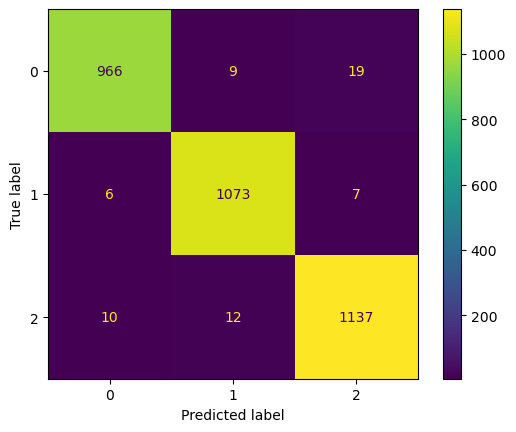

In [255]:
ConfusionMatrixDisplay(confusion_matrix(y_train, y_train_pred)).plot()
plt.show()

In [256]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_train, y_train_pred, average='macro')
print(f'Precisión: {precision}')

# Calcular el recall
recall = recall_score(y_train, y_train_pred, average='macro')
print(f'Recall: {recall}')

# Calcular el F1-score
f1 = f1_score(y_train, y_train_pred, average='macro')
print(f'F1 Score: {f1}')

Precisión: 0.9807183775406063
Recall: 0.9802928569712245
F1 Score: 0.9804882095405715


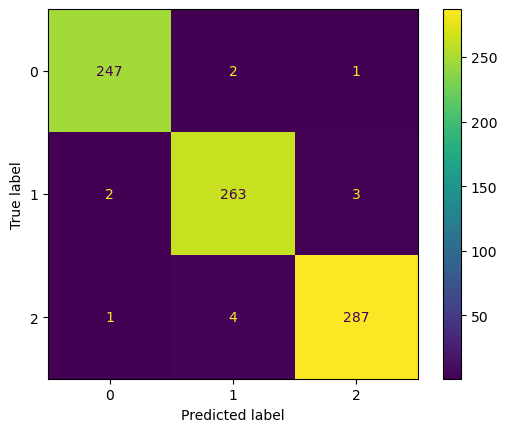

In [258]:
model = pipeline.steps[0][1]
y_test_pred = model.predict(x_test)
ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred)).plot()
plt.show()


In [259]:
precision_test = precision_score(y_test, y_test_pred, average='macro')
print(f'Precisión test: {precision_test}')

# Calcular el recall
recall_test = recall_score(y_test, y_test_pred, average='macro')

print(f'Recall test: {recall_test}')

# Calcular el F1-score
f1_test = f1_score(y_test, y_test_pred, average='macro')

print(f'F1 Score test: {f1_test}')


Precisión test: 0.9839831542729639
Recall test: 0.9840733319702856
F1 Score test: 0.9840261452939855


In [260]:
df2 = pd.read_csv(file2, encoding='UTF-8')

df["sdg"].value_counts()

sdg
5    1451
4    1354
3    1244
Name: count, dtype: int64